# M-Estimators for Robust Linear Modeling

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [14]:
x = np.linspace(-100, 100, 1000)
norm_pdf = stats.norm(loc=0, scale=1).pdf(x)

In [15]:
t_1_pdf = stats.t(loc=0, scale=1, df=1).pdf(x)

t_5_pdf = stats.t(loc=0, scale=1, df=5).pdf(x)

c_pdf = stats.cauchy(loc=0, scale=1).pdf(x)

In [22]:
from tqdm import tqdm
means = []
for _ in tqdm(range(1000)):
    samples = stats.cauchy(loc=0, scale=1).rvs(1_000_000)
    means.append(np.mean(samples))

* An M-estimator minimizes the function 

$$Q(e_i, \rho) = \sum_i~\rho\left(\frac{e_i}{s}\right)$$

where $\rho$ is a symmetric function of the residuals 

* The effect of $\rho$ is to reduce the influence of outliers
* $s$ is an estimate of scale. 
* The robust estimates $\hat{\beta}$ are computed by the iteratively re-weighted least squares algorithm

* We have several choices available for the weighting functions to be used

In [24]:
norms = sm.robust.norms

In [25]:
def plot_weights(support, weights_func, xlabels, xticks):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.plot(support, weights_func(support))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, fontsize=16)
    ax.set_ylim(-.1, 1.1)
    return ax

### Andrew's Wave

In [ ]:
sm.RLM()

In [26]:
help(norms.AndrewWave.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Andrew's wave weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array_like
        1d array
    
    Returns
    -------
    weights : ndarray
        weights(z) = sin(z/a)/(z/a)     for \|z\| <= a*pi
    
        weights(z) = 0                  for \|z\| > a*pi



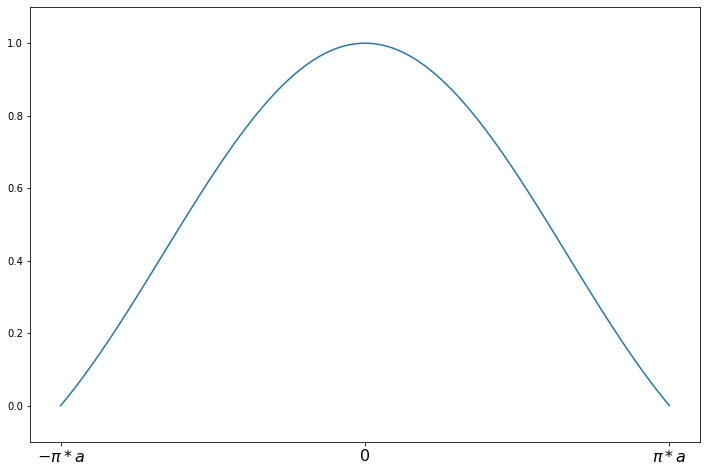

In [27]:
a = 1.339
support = np.linspace(-np.pi*a, np.pi*a, 100)
andrew = norms.AndrewWave(a=a)
plot_weights(support, andrew.weights, ['$-\pi*a$', '0', '$\pi*a$'], [-np.pi*a, 0, np.pi*a]);

### Hampel's 17A

In [28]:
help(norms.Hampel.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Hampel weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array_like
        1d array
    
    Returns
    -------
    weights : ndarray
        weights(z) = 1                            for \|z\| <= a
    
        weights(z) = a/\|z\|                        for a < \|z\| <= b
    
        weights(z) = a*(c - \|z\|)/(\|z\|*(c-b))      for b < \|z\| <= c
    
        weights(z) = 0                            for \|z\| > c



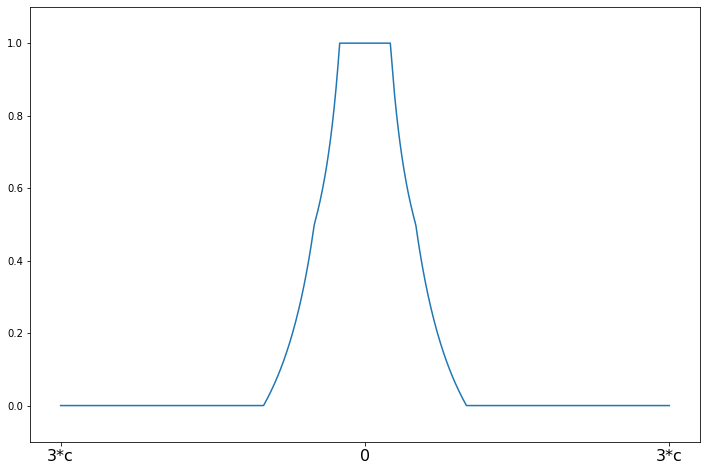

In [29]:
c = 8
support = np.linspace(-3*c, 3*c, 1000)
hampel = norms.Hampel(a=2., b=4., c=c)
plot_weights(support, hampel.weights, ['3*c', '0', '3*c'], [-3*c, 0, 3*c]);

### Huber's t

In [30]:
help(norms.HuberT.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Huber's t weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array_like
        1d array
    
    Returns
    -------
    weights : ndarray
        weights(z) = 1          for \|z\| <= t
    
        weights(z) = t/\|z\|      for \|z\| > t



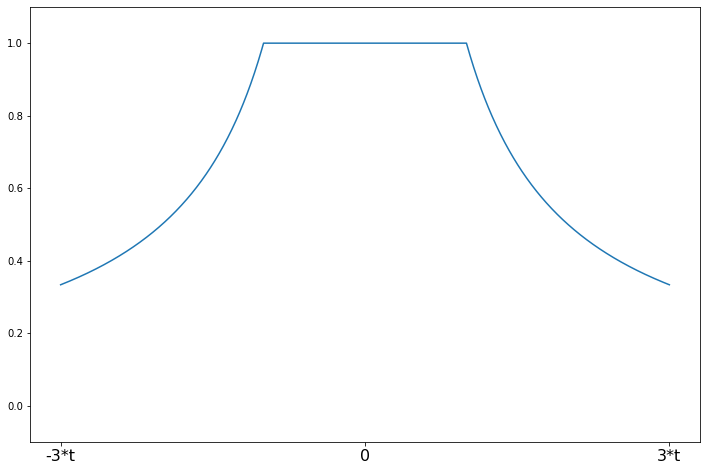

In [31]:
t = 1.345
support = np.linspace(-3*t, 3*t, 1000)
huber = norms.HuberT(t=t)
plot_weights(support, huber.weights, ['-3*t', '0', '3*t'], [-3*t, 0, 3*t]);

### Least Squares

In [32]:
help(norms.LeastSquares.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    The least squares estimator weighting function for the IRLS algorithm.
    
    The psi function scaled by the input z
    
    Parameters
    ----------
    z : array_like
        1d array
    
    Returns
    -------
    weights : ndarray
        weights(z) = np.ones(z.shape)



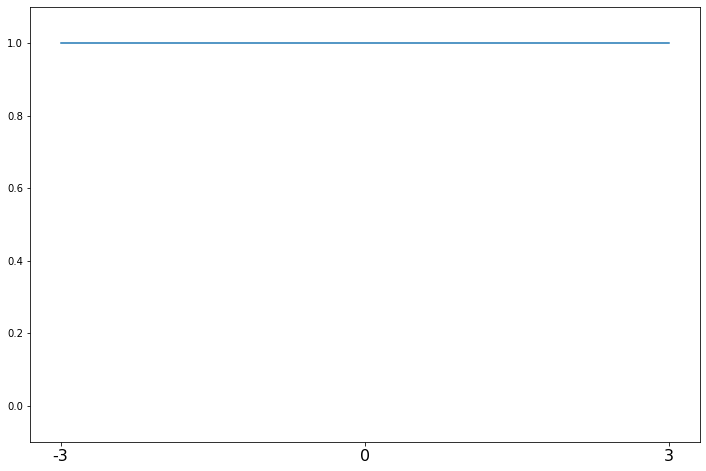

In [33]:
support = np.linspace(-3, 3, 1000)
lst_sq = norms.LeastSquares()
plot_weights(support, lst_sq.weights, ['-3', '0', '3'], [-3, 0, 3]);

### Ramsay's Ea

In [34]:
help(norms.RamsayE.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Ramsay's Ea weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array_like
        1d array
    
    Returns
    -------
    weights : ndarray
        weights(z) = exp(-a*\|z\|)



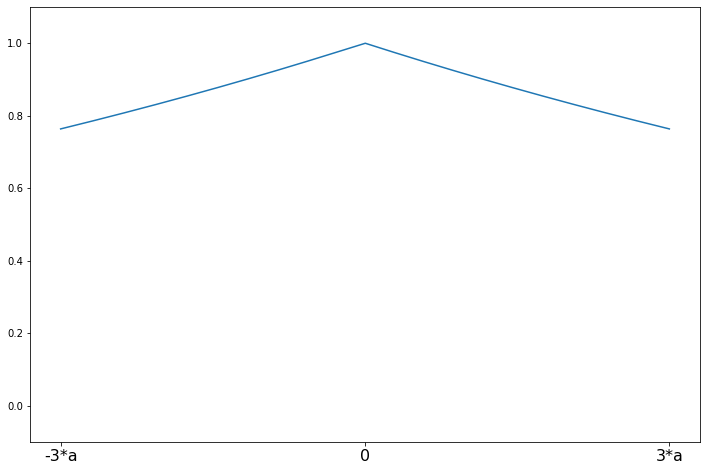

In [35]:
a = .3
support = np.linspace(-3*a, 3*a, 1000)
ramsay = norms.RamsayE(a=a)
plot_weights(support, ramsay.weights, ['-3*a', '0', '3*a'], [-3*a, 0, 3*a]);

### Trimmed Mean

In [36]:
help(norms.TrimmedMean.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Least trimmed mean weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array_like
        1d array
    
    Returns
    -------
    weights : ndarray
        weights(z) = 1             for \|z\| <= c
    
        weights(z) = 0             for \|z\| > c



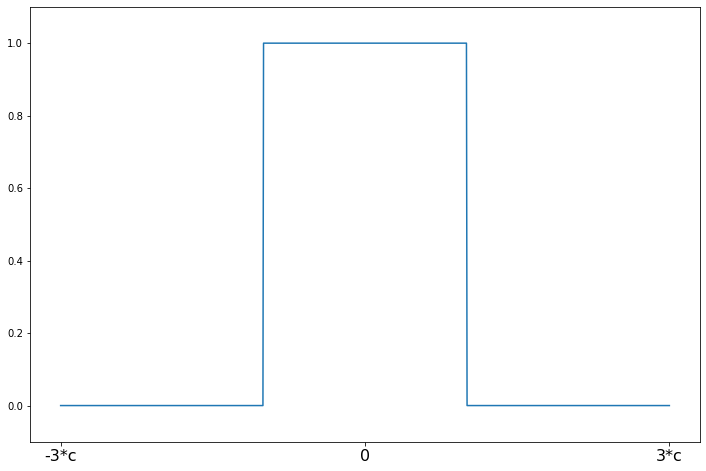

In [37]:
c = 2
support = np.linspace(-3*c, 3*c, 1000)
trimmed = norms.TrimmedMean(c=c)
plot_weights(support, trimmed.weights, ['-3*c', '0', '3*c'], [-3*c, 0, 3*c]);

### Tukey's Biweight

In [38]:
help(norms.TukeyBiweight.weights)

Help on function weights in module statsmodels.robust.norms:

weights(self, z)
    Tukey's biweight weighting function for the IRLS algorithm
    
    The psi function scaled by z
    
    Parameters
    ----------
    z : array_like
        1d array
    
    Returns
    -------
    weights : ndarray
        psi(z) = (1 - (z/c)**2)**2          for \|z\| <= R
    
        psi(z) = 0                          for \|z\| > R



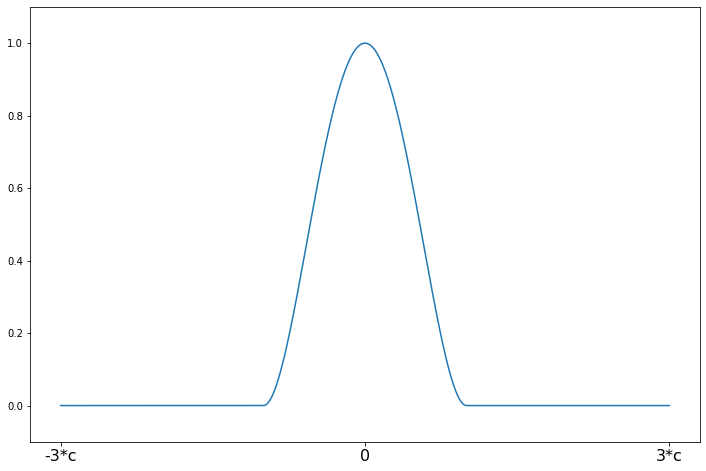

In [39]:
c = 4.685
support = np.linspace(-3*c, 3*c, 1000)
tukey = norms.TukeyBiweight(c=c)
plot_weights(support, tukey.weights, ['-3*c', '0', '3*c'], [-3*c, 0, 3*c]);

### Scale Estimators

In [40]:
x = np.array([1, 2, 3, 4, 500])

* The mean is not a robust estimator of location

In [41]:
x.mean()

102.0

* The median, on the other hand, is a robust estimator with a breakdown point of 50%

In [42]:
np.median(x)

3.0

In [43]:
x.std()

199.00251254695254

Median Absolute Deviation

$$ median_i |X_i - median_j(X_j)|) $$

Standardized Median Absolute Deviation is a consistent estimator for $\hat{\sigma}$

$$\hat{\sigma}=K \cdot MAD$$

where $K$ depends on the distribution. For the normal distribution for example,

$$K = \Phi^{-1}(.75)$$

In [48]:
stats.t.ppf(.75, df=1)

1.0000000000133886

In [45]:
stats.norm.ppf(.95)

1.6448536269514722

In [ ]:
print(x)

In [ ]:
sm.robust.scale.mad(x)

In [ ]:
np.array([1,2,3,4,5.]).std()

In [ ]:
np.random.seed(12345)
fat_tails = stats.t(6).rvs(40)

In [ ]:
kde = sm.nonparametric.KDEUnivariate(fat_tails)
kde.fit()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(kde.support, kde.density);

In [ ]:
print(fat_tails.mean(), fat_tails.std())

In [ ]:
print(stats.norm.fit(fat_tails))

In [ ]:
print(stats.t.fit(fat_tails, f0=6))

In [ ]:
huber = sm.robust.scale.Huber()
loc, scale = huber(fat_tails)
print(loc, scale)

In [ ]:
sm.robust.mad(fat_tails)

In [ ]:
sm.robust.mad(fat_tails, c=stats.t(6).ppf(.75))

In [ ]:
sm.robust.scale.mad(fat_tails)

### Duncan's Occupational Prestige data - M-estimation for outliers

In [ ]:
from statsmodels.graphics.api import abline_plot
from statsmodels.formula.api import ols, rlm

In [ ]:
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data

In [ ]:
print(prestige.head(20))

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211, xlabel='Income', ylabel='Prestige')
ax1.scatter(prestige.income, prestige.prestige)
xy_outlier = prestige.loc[prestige.index == 'minister', ['income','prestige']].iloc[0]
ax1.annotate('Minister', xy_outlier, xy_outlier + 1, fontsize=16)
ax2 = fig.add_subplot(212, xlabel='Education',
                           ylabel='Prestige')
ax2.scatter(prestige.education, prestige.prestige);

In [ ]:
ols_model = ols('prestige ~ income + education', prestige).fit()
print(ols_model.summary())

In [ ]:
infl = ols_model.get_influence()
student = infl.summary_frame()['student_resid']
print(student)

In [ ]:
student.loc[np.abs(student) > 2]

In [ ]:
sidak = ols_model.outlier_test('sidak')
sidak.sort_values('unadj_p', inplace=True)
print(sidak)

In [ ]:
fdr = ols_model.outlier_test('fdr_bh')
fdr.sort_values('unadj_p', inplace=True)
print(fdr)

In [ ]:
rlm_model = rlm('prestige ~ income + education', prestige).fit()
print(rlm_model.summary())

In [ ]:
print(rlm_model.weights)

### Hertzprung Russell data for Star Cluster CYG 0B1 - Leverage Points

* Data is on the luminosity and temperature of 47 stars in the direction of Cygnus.

In [ ]:
dta = sm.datasets.get_rdataset("starsCYG", "robustbase", cache=True).data

In [ ]:
from matplotlib.patches import Ellipse
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, xlabel='log(Temp)', ylabel='log(Light)', title='Hertzsprung-Russell Diagram of Star Cluster CYG OB1')
ax.scatter(*dta.values.T)
# highlight outliers
e = Ellipse((3.5, 6), .2, 1, alpha=.25, color='r')
ax.add_patch(e);
ax.annotate('Red giants', xy=(3.6, 6), xytext=(3.8, 6),
            arrowprops=dict(facecolor='black', shrink=0.05, width=2),
            horizontalalignment='left', verticalalignment='bottom',
            clip_on=True, # clip to the axes bounding box
            fontsize=16,
     )
# annotate these with their index
for i, row in dta.loc[dta['log.Te'] < 3.8].iterrows():
    ax.annotate(i, row, row + .01, fontsize=14)
xlim, ylim = ax.get_xlim(), ax.get_ylim()

In [ ]:
from IPython.display import Image
Image(filename='star_diagram.png')

In [ ]:
y = dta['log.light']
X = sm.add_constant(dta['log.Te'], prepend=True)
ols_model = sm.OLS(y, X).fit()
abline_plot(model_results=ols_model, ax=ax)

In [ ]:
rlm_mod = sm.RLM(y, X, sm.robust.norms.TrimmedMean(.5)).fit()
abline_plot(model_results=rlm_mod, ax=ax, color='red')

* Why? Because M-estimators are not robust to leverage points.

In [ ]:
infl = ols_model.get_influence()

In [ ]:
h_bar = 2*(ols_model.df_model + 1 )/ols_model.nobs
hat_diag = infl.summary_frame()['hat_diag']
hat_diag.loc[hat_diag > h_bar]

In [ ]:
sidak2 = ols_model.outlier_test('sidak')
sidak2.sort_values('unadj_p', inplace=True)
print(sidak2)

In [ ]:
fdr2 = ols_model.outlier_test('fdr_bh')
fdr2.sort_values('unadj_p', inplace=True)
print(fdr2)

In [ ]:
weights = np.ones(len(X))
weights[X[X['log.Te'] < 3.8].index.values - 1] = 0
wls_model = sm.WLS(y, X, weights=weights).fit()
abline_plot(model_results=wls_model, ax=ax, color='green')

* MM estimators are good for this type of problem, unfortunately, we don't yet have these yet. 

### Exercise: Breakdown points of M-estimator

In [ ]:
np.random.seed(12345)
nobs = 200
beta_true = np.array([3, 1, 2.5, 3, -4])
X = np.random.uniform(-20, 20, size=(nobs, len(beta_true) - 1))
# stack a constant in front
X = sm.add_constant(X, prepend=True) # np.c_[np.ones(nobs), X]
mc_iter = 500
contaminate = .35 # percentage of response variables to contaminate

In [ ]:
all_betas = []
for i in range(mc_iter):
    y = np.dot(X, beta_true) + np.random.normal(size=200)
    random_idx = np.random.randint(0, nobs, size=int(contaminate * nobs))
    y[random_idx] = np.random.uniform(-750, 750)
    beta_hat = sm.RLM(y, X).fit().params
    all_betas.append(beta_hat)

In [ ]:
all_betas = np.asarray(all_betas)
se_loss = lambda x : np.linalg.norm(x, ord=2)**2
se_beta = list(map(se_loss, all_betas - beta_true))

#### Squared error loss

In [ ]:
np.array(se_beta).mean()

In [ ]:
all_betas.mean(0)

In [ ]:
beta_true

In [ ]:
se_loss(all_betas.mean(0) - beta_true)